# Race and Ethnicity (combined)
Covid-19 has disproportionally affected different races and ethnicities. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading the file
#MUST CHANGE FILEPATH TO 'data/clean_data.csv'
file = pd.read_csv('covid/data/clean_data.csv')

file

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,month,inpatient__occupancy,percent_of_inpatients_with_covid
0,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
1,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
2,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,1.0,11,0.688734,0.151200
3,2020/11/09,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,0.0,11,0.688734,0.151200
4,2020/11/06,2020/11/10,2020/11/06,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,1.0,11,0.688734,0.151200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457726,2020/02/17,2020/03/30,2020/02/17,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,1.0,2,0.461779,0.004861
457727,2020/02/29,2020/03/30,2020/02/29,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,1.0,1.0,0.0,0.0,2,0.461779,0.004861
457728,2020/02/29,2020/04/08,2020/02/29,Laboratory-confirmed case,1.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,0.0,2,0.461779,0.004861
457729,2020/02/11,2020/07/10,2020/02/11,Laboratory-confirmed case,0.0,60 - 69 Years,White,0.0,0.0,0.0,0.0,2,0.461779,0.004861


In [3]:
#organizing different enthnicities by month

dates = file[['month','Race and ethnicity (combined)',"death_yn"]]

total_cases_by_month = dates.groupby(['month','Race and ethnicity (combined)']).count()
total_cases_by_month

death_yn
month Race and ethnicity (combined)          
1     Asian                                 4
      Black                                 3
      Hispanic                              2
      White                                 7
2     Asian                                 6
...                                       ...
11    Hispanic                          10413
      Native                              187
      Other                              2097
      Pacific Islander                    313
      White                             50205

[72 rows x 1 columns]

In [4]:
#pulling out just the deaths
deaths = dates.groupby(dates["month"]).sum()
deaths

,death_yn
month,
1,0.0
2,16.0
3,2925.0
4,5574.0
5,3374.0
6,8381.0
7,2524.0
8,2057.0
9,1395.0


In [5]:
#getting the deaths of different races
ethnicity = dates.groupby([dates['month'],dates['Race and ethnicity (combined)']]).sum()
#getting the total cases of different races
ethnic_story = dates.groupby([dates['month'],dates['Race and ethnicity (combined)']]).count()
ethnic_story = ethnic_story.unstack()
ethnicity = ethnicity.unstack()
ethnicity

death_yn                                 \
Race and ethnicity (combined)    Asian   Black Hispanic Native  Other   
month                                                                   
1                                  0.0     0.0      0.0    NaN    NaN   
2                                  0.0     6.0      4.0    NaN    0.0   
3                                195.0   781.0    759.0    3.0  147.0   
4                                235.0  1133.0   1067.0   12.0  295.0   
5                                123.0   598.0    333.0   35.0  117.0   
6                                466.0  1894.0   1642.0   23.0  117.0   
7                                 99.0   626.0    399.0   25.0   49.0   
8                                 50.0   321.0    189.0   15.0   33.0   
9                                 37.0   188.0    113.0   15.0   24.0   
10                                34.0   200.0    103.0   18.0   42.0   
11                                13.0    95.0     62.0    4.0   36.0   

                                                        
Race and ethnicity (combined) Pacific Islander   White  
month                                                   
1                                          NaN     0.0  
2                                          NaN     6.0  
3                                          6.0  1034.0  
4                                         12.0  2820.0  
5                                         26.0  2142.0  
6                                         23.0  4216.0  
7                                         16.0  1310.0  
8                                         13.0  1436.0  
9                                          8.0  1010.0  
10                                         4.0  1499.0  
11                                         3.0   810.0

In [6]:
#organizing data into pie charts
pie_chart = file.groupby("Race and ethnicity (combined)")["death_yn"].sum()
cases = file.groupby("Race and ethnicity (combined)")["death_yn"].count()
#pie_chart
cases

Race and ethnicity (combined)
Asian                13515
Black                55636
Hispanic             97731
Native                1643
Other                13544
Pacific Islander      2648
White               273014
Name: death_yn, dtype: int64

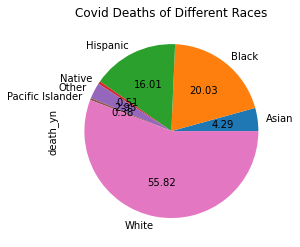

In [37]:
#plotting the pie chart
plot = pie_chart.plot.pie(y=pie_chart[1], autopct='%.2f',title="Covid Deaths of Different Races")

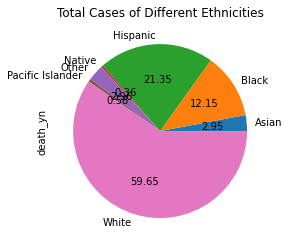

In [38]:
#displaying the percentage of total cases by ethnicity
plot = cases.plot.pie(y=pie_chart[1], autopct="%.2f", title="Total Cases of Different Ethnicities")

In [9]:
#building a bar graph of the cases and deaths to compare percentages
bar_df = pd.DataFrame(pie_chart)
bar_df['total cases'] = cases
bar_df

,death_yn,total cases
Race and ethnicity (combined),,
Asian,1252.0,13515
Black,5842.0,55636
Hispanic,4671.0,97731
Native,150.0,1643
Other,860.0,13544
Pacific Islander,111.0,2648
White,16283.0,273014


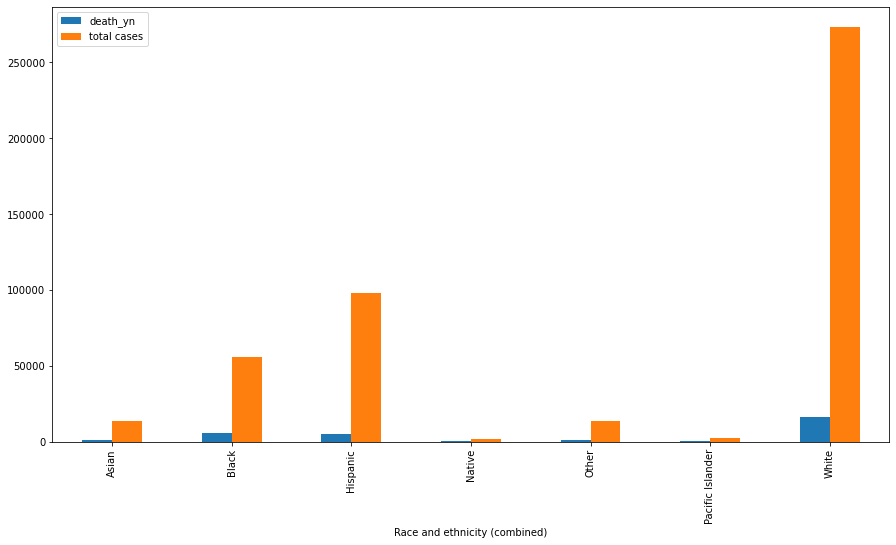

In [10]:
#displaying the bar graph
bar_graph = bar_df.plot.bar(figsize=(15,8))

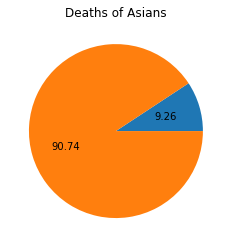

In [45]:
#survival rate of cases vs deaths for Asian people
pie_chart_asian = [bar_df['death_yn']['Asian'],
                   (bar_df['total cases']['Asian']-bar_df['death_yn']['Asian'])]
pie_chart_asian

plt.title("Deaths of Asians")
chart = plt.pie(pie_chart_asian,autopct='%.2f')

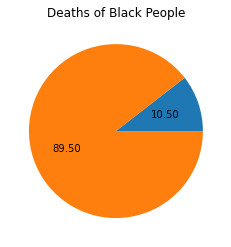

In [46]:
#survival rate of Black people
pie_chart_black = [bar_df['death_yn']['Black'],
                   (bar_df['total cases']['Black']-bar_df['death_yn']['Black'])]
pie_chart_black
plt.title("Deaths of Black People")
chart = plt.pie(pie_chart_black,autopct='%.2f')

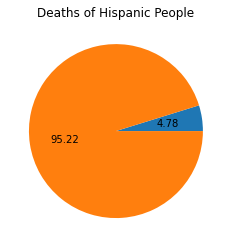

In [47]:
#survival rate of Hispanic people
pie_chart_hisp = [bar_df['death_yn']['Hispanic'],
                   (bar_df['total cases']['Hispanic']-bar_df['death_yn']['Hispanic'])]
pie_chart_hisp
plt.title('Deaths of Hispanic People')
chart = plt.pie(pie_chart_hisp,autopct='%.2f')

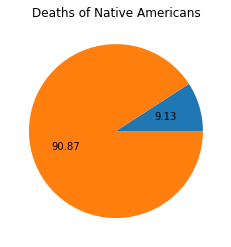

In [48]:
#survival rate of Native American people
pie_chart_native = [bar_df['death_yn']['Native'],
                   (bar_df['total cases']['Native']-bar_df['death_yn']['Native'])]
pie_chart_native
plt.title('Deaths of Native Americans')
chart = plt.pie(pie_chart_native,autopct='%.2f')

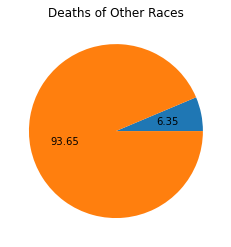

In [49]:
#survival rate of the group of people of other ethnicity
pie_chart_other = [bar_df['death_yn']['Other'],
                   (bar_df['total cases']['Other']-bar_df['death_yn']['Other'])]
pie_chart_other
plt.title("Deaths of Other Races")
chart = plt.pie(pie_chart_other,autopct='%.2f')

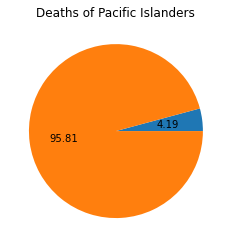

In [50]:
#suvival rate of Pacific Islander people
pie_chart_pac = [bar_df['death_yn']['Pacific Islander'],
                   (bar_df['total cases']['Pacific Islander']-bar_df['death_yn']['Pacific Islander'])]
pie_chart_pac
plt.title("Deaths of Pacific Islanders")
chart = plt.pie(pie_chart_pac,autopct='%.2f')

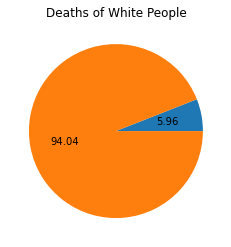

In [51]:
#survival rate of White people
pie_chart_white = [bar_df['death_yn']['White'],
                   (bar_df['total cases']['White']-bar_df['death_yn']['White'])]
pie_chart_white
plt.title("Deaths of White People")
chart = plt.pie(pie_chart_white,autopct='%.2f')

### Going through all the pie charts there are some interesting notes to take.
The deaths of Pacific Islanders in our data set are only 4.19% of the cases of Pacific Islanders.
White people, Hispanic people, and other races have a ~5-7% death rate in this data set, but native Americans and black people have a relatively high death rate of around 10%. This could be due to access to proper healthcare, but that wouldn't explain why hispanic people die less often than white people when white people more frequently have health insurance(1).
Perhaps hispanic people have different a different reaction to Covid-19 than other races, or perhaps culturally they treat their sick ones differently than other races.

1: https://www.statista.com/statistics/200970/percentage-of-americans-without-health-insurance-by-race-ethnicity/

In [52]:
#building a dataframe of months and different races deaths
#which I already did in my other file
time=file[['Race and ethnicity (combined)','month','death_yn']]

In [53]:
#putting together a dataframe of 
#information from the census and my findings
population_info = {"Ethnicity":['White','Hispanic','Black','Asian','Native American','Pacific Islander','Other'],
                  'Total Population':[200226109,60724311,43984096,12366132,4267114,656479,1969437],
                  'Percentage of US Population':[60.1,18.5,13.4,5.9,1.3,0.2,0.6],
                  'Percentage of Total Cases':[59.65,21.35,12.15,2.95,0.36,0.56,np.nan],
                  'Percentage of Total Deaths':[55.82,16.01,20.03,4.29,0.51,0.36,np.nan],
                  'Percentage of Ethnicity Reporting Covid':[0.136,0.16,0.126,0.0697,0.0385,0.062,np.nan]}
population_df = pd.DataFrame(population_info)
population_df

,Ethnicity,Total Population,Percentage of US Population,Percentage of Total Cases,Percentage of Total Deaths,Percentage of Ethnicity Reporting Covid
0,White,200226109,60.1,59.65,55.82,0.1360
1,Hispanic,60724311,18.5,21.35,16.01,0.1600
2,Black,43984096,13.4,12.15,20.03,0.1260
3,Asian,12366132,5.9,2.95,4.29,0.0697
4,Native American,4267114,1.3,0.36,0.51,0.0385
5,Pacific Islander,656479,0.2,0.56,0.36,0.0620
6,Other,1969437,0.6,NaN,NaN,NaN


# Percentages of populations
In this chart I wanted to collate some data I found both in my research and from the census. Since I noticed that hispanic people tend to survive more often I wanted to actually dig into the numbers a little bit. Here you can see that while hispanic people only account for 18.5% of the total US population, they had 21.35% of the cases of covid in our data set. Interestingly, they only have 16.01% of the deaths in our data set. Which is a lower percentage than that of their respective part of the total US population. So what we're seeing here is that hispanic people are suviving more than other races, despite being less insured.

Interestingly, Asian people have presumably been much more responsible about social distancing, as their percentage of the total cases is about half of their percentage of the total US population. 

Black people have been hit the hardest, with 20% of the total deaths from covid, while only making up 13.4% of the total population.

1: https://www.census.gov/quickfacts/fact/table/US/RHI725219

In [54]:
#building new dataframe for gender and race
genders = file[['sex','Race and ethnicity (combined)',"death_yn"]]
#getting the deaths of different races
ethnicity_gender = genders.groupby([genders['sex'],genders['Race and ethnicity (combined)']]).sum()
#getting the total cases of different races
ethnic_gender = genders.groupby([genders['sex'],genders['Race and ethnicity (combined)']]).count()
ethnic_gender = ethnic_gender.unstack()
ethnicity_with_gender = ethnicity_gender.unstack()
ethnicity_with_gender

death_yn                                 \
Race and ethnicity (combined)    Asian   Black Hispanic Native  Other   
sex                                                                     
0.0                              472.0  2680.0   1553.0   69.0  330.0   
1.0                              780.0  3162.0   3118.0   81.0  530.0   

                                                        
Race and ethnicity (combined) Pacific Islander   White  
sex                                                     
0.0                                       31.0  7261.0  
1.0                                       80.0  9022.0

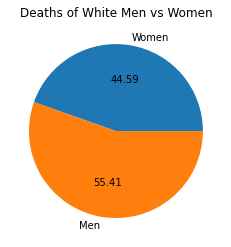

In [57]:
#displaying deaths of each gender of White people
white_genders = ethnicity_with_gender['death_yn']['White']
plt.title("Deaths of White Men vs Women")

chart = plt.pie(white_genders,autopct='%.2f',labels=("Women","Men"))

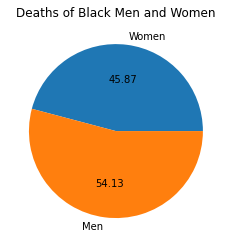

In [58]:
#displaying deaths of each gender of Black people
black_genders = ethnicity_with_gender['death_yn']['Black']
plt.title("Deaths of Black Men and Women")
chart = plt.pie(black_genders,autopct='%.2f',labels=("Women","Men"))

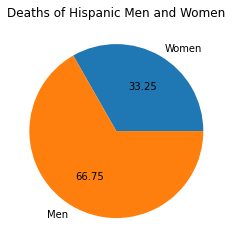

In [60]:
#displaying deaths of each gender of Hispanic people
hispanic_genders = ethnicity_with_gender['death_yn']['Hispanic']
plt.title("Deaths of Hispanic Men and Women")
chart = plt.pie(hispanic_genders,autopct='%.2f',labels=("Women","Men"))

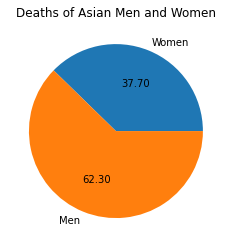

In [61]:
#displaying deaths of each gender of Asian people
asian_genders = ethnicity_with_gender['death_yn']['Asian']
plt.title("Deaths of Asian Men and Women")
chart = plt.pie(asian_genders,autopct='%.2f',labels=("Women","Men"))

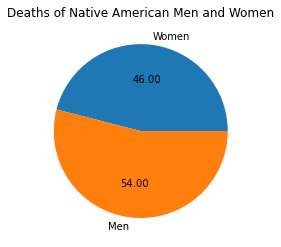

In [63]:
#displaying deaths of each gender of Native American people
native_genders = ethnicity_with_gender['death_yn']['Native']
plt.title("Deaths of Native American Men and Women")
chart = plt.pie(native_genders,autopct='%.2f',labels=("Women","Men"))

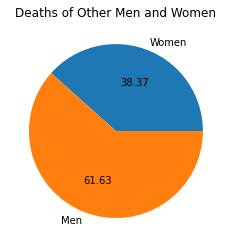

In [65]:
#displaying deaths of each gender of the other races
other_genders = ethnicity_with_gender['death_yn']['Other']
plt.title("Deaths of Other Men and Women")
chart = plt.pie(other_genders,autopct='%.2f',labels=("Women","Men"))

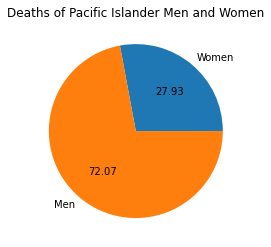

In [66]:
#displaying deaths of each gender of Pacific Islander people
pac_genders = ethnicity_with_gender['death_yn']['Pacific Islander']
plt.title("Deaths of Pacific Islander Men and Women")
chart = plt.pie(pac_genders,autopct='%.2f',labels=("Women","Men"))

### Some interesting things to note here.
White people and black people are pretty similar, with women being 60% more likely to survive than men. Pacific Islanders and hispanic people have vastly differing numbers, with women surviving around 70% more than men. This may be related to the fact that a higher percentage of women stay home than men, who tend to be more employed(1). This could also be cultural, especially the difference with Asian women vs men, as only 6.5% of Asian women are employed as of 2019(2).

1: https://work.chron.com/male-vs-female-statistics-workplace-america-23880.html

2: https://www.bls.gov/cps/cpsaat11.htm

In [28]:
#building dataframe for race with co-morbidity
#building new dataframe for co-morbidity and race
med = file[['medcond_yn','Race and ethnicity (combined)',"death_yn"]]
#getting the deaths of different races
ethnicity_med = med.groupby([med['medcond_yn'],med['Race and ethnicity (combined)']]).sum()
#getting the total cases of different races
ethnic_med = med.groupby([med['medcond_yn'],med['Race and ethnicity (combined)']]).count()
ethnic_med = ethnic_med.unstack()
ethnicity_with_med = ethnicity_med.unstack()
ethnic_med

death_yn                               \
Race and ethnicity (combined)    Asian  Black Hispanic Native Other   
medcond_yn                                                            
0.0                               7202  16636    52685    539  6917   
1.0                               6313  39000    45046   1104  6627   

                                                        
Race and ethnicity (combined) Pacific Islander   White  
medcond_yn                                              
0.0                                       1028  121621  
1.0                                       1620  151393

In [29]:
#these are the deaths of each race and
#whether or not they had pre-existing conditions
ethnicity_with_med

death_yn                                 \
Race and ethnicity (combined)    Asian   Black Hispanic Native  Other   
medcond_yn                                                              
0.0                               77.0   216.0    303.0   10.0   49.0   
1.0                             1175.0  5626.0   4368.0  140.0  811.0   

                                                         
Race and ethnicity (combined) Pacific Islander    White  
medcond_yn                                               
0.0                                       21.0    995.0  
1.0                                       90.0  15288.0

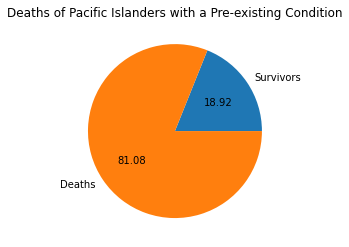

In [69]:
#survival rate of Pacific Islanders with
#a pre-existing medical condition
pac_med = ethnicity_with_med['death_yn']['Pacific Islander']
plt.title("Deaths of Pacific Islanders with a Pre-existing Condition")
chart = plt.pie(pac_med,autopct='%.2f',labels=("Survivors","Deaths"))

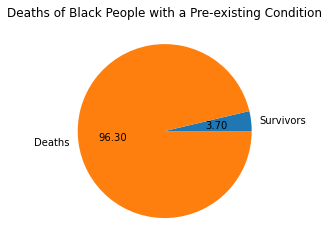

In [70]:
#survival rate of Black people with
#a pre-existing medical condition
black_med = ethnicity_with_med['death_yn']['Black']
plt.title("Deaths of Black People with a Pre-existing Condition")
chart = plt.pie(black_med,autopct='%.2f',labels=("Survivors","Deaths"))

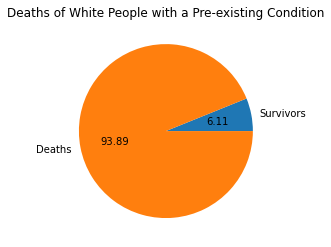

In [71]:
#survival rate of White people with
#a pre-existing medical condition
white_med = ethnicity_with_med['death_yn']['White']
plt.title("Deaths of White People with a Pre-existing Condition")
chart = plt.pie(white_med,autopct='%.2f',labels=("Survivors","Deaths"))

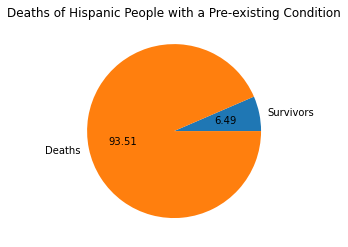

In [73]:
#survival rate of Hispanic pople with
#a pre-existing medical condition
hispanic_med = ethnicity_with_med['death_yn']['Hispanic']
plt.title("Deaths of Hispanic People with a Pre-existing Condition")
chart = plt.pie(hispanic_med,autopct='%.2f',labels=("Survivors","Deaths"))

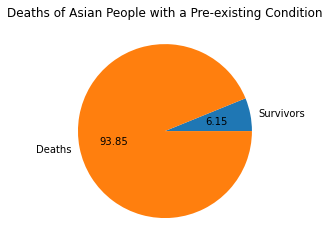

In [74]:
#survival rate of Asian people with
#a pre-existing medical condition
asian_med = ethnicity_with_med['death_yn']['Asian']
plt.title("Deaths of Asian People with a Pre-existing Condition")
chart = plt.pie(asian_med,autopct='%.2f',labels=("Survivors","Deaths"))

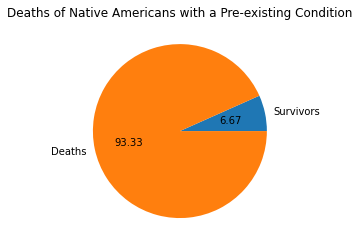

In [75]:
#survival rate of Native Americans with
#a pre-existing medical condition
native_med = ethnicity_with_med['death_yn']['Native']
plt.title("Deaths of Native Americans with a Pre-existing Condition")
chart = plt.pie(native_med,autopct='%.2f',labels=("Survivors","Deaths"))

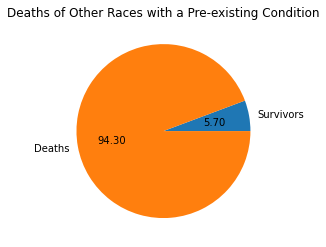

In [76]:
#survival rate of other people with
#a pre-existing medical condition
other_med = ethnicity_with_med['death_yn']['Other']
plt.title("Deaths of Other Races with a Pre-existing Condition")
chart = plt.pie(other_med,autopct='%.2f',labels=("Survivors","Deaths"))

## Here we see that pre-existing conditions is a MAJOR factor in survivability
It's interesting to note that Pacific Islanders with pre-existing conditions have such a higher survival rate than all of the other ethnic groups at 18.92.
Unfortunaly, we again see that black people have been hit hard by covid, with only 3.7% survivability with a pre-existing condition.
Everybody else has a survivability of around 6-7% with a pre-existing condition.